# A/B тест №1

**Контекст** <br>
Мы считаем, что наш продукт достаточно дорогой для клиента.<br>
У нас есть гипотеза, что уменьшение цены продукта позволит повысить частоту продаж и суммарно увеличит доходность продукта.<br>
**Тест**<br>
Мы проводим тест, в рамках которого контролем является<br>
продажа продукта со старой ценой, а тестом - продажа продукта с новой ценой.<br>
Целью этого теста является проверка гипотезы роста доходности нашего продукта из-за уменьшения тарифа.<br>
**Статистические вводные**<br>
Уровень значимости 5%.<br>
Мы хотели бы различать 5%-ное<br>
изменение целевой метрики<br>
с вероятностью 80%.

**Описание данных** <br>

Процесс продажи устроен следующим образом:<br>

- создаётся задание на звонок человеку;<br>
- оператор берёт задание и пытается дозвониться до человека;<br>
- если не дозванивается, мы несём некоторые затраты на время оператора и поддержку инфраструктуры;<br>
- если дозванивается, пытается продать наш продукт;<br>
- если продал, мы имеем некоторый заработок (PV) и повышенные расходы (в том числе на вознаграждение оператора).<br>

Описание колонок в исторических данных.<br>

- ID - номер задания на звонок<br>
- Флаг дозвона - 1 если в рамках задания мы дозвонились человеку, иначе 0<br>
- Флаг продажи - 1 если в рамках задания мы продали наш продукт человеку, иначе 0<br>
- Расходы - сумма затрат на задание<br>
- PV - 0 если мы не продали наш продукт, иначе = PV проданного продукта<br>
- NPV = PV - Расходы

### 1. Выбираем метрику и приводим аргументацию.

**Метрика - NPV** - наиболее показательный параметр дохода, в который заложены все риски недозвона или отказа от покупки продукта <br>

**Аргументация**: NPV учитывает все доходы и расходы, связанные с продуктом, в том числе прямые и косвенные затраты. Если мы уменьшим цену продукта, то мы можем увеличить его частоту продаж, но это может привести к увеличению затрат на производство, маркетинг и т.д. NPV учитывает все эти затраты и помогает нам оценить, будет ли уменьшение цены продукта действительно прибыльным. <br>
<br>
Также NPV позволяет нам увидеть долгосрочный эффект изменения цены продукта. Уменьшение цены продукта может привести к увеличению продаж в краткосрочной перспективе, но может также привести к снижению ценности бренда в долгосрочной перспективе. NPV помогает нам оценить, как изменение цены продукта повлияет на его доходность в долгосрочной перспективе и принять обоснованное решение.

### 2. Альтернатива в критерии.

По условию задачи у нас есть предпочтения, что мы хотим выявить только рост доходности нашего продукта из-за уменьшения тарифа, значит используем одностороннюю альтернативу <br>
<br>
Её использование позволяет уменьшить вероятность ложноположительных результатов, т.е. ошибочно считать, что изменение тарифа привело к увеличению доходности продукта, когда на самом деле это не так. Если мы используем двустороннюю альтернативу, то мы должны рассматривать оба направления изменения метрики, что увеличивает вероятность получения ложноположительных результатов. <br>
<br>
Кроме того, использование односторонней альтернативы может помочь нам сфокусироваться на наших целях и получить более четкие и практически значимые результаты. Если мы заранее знаем, что наша гипотеза заключается только в увеличении доходности от изменения тарифа, то мы можем использовать эту информацию для более эффективного проведения А/В теста и более точной оценки его результатов.

### 3. Каков размер выборки? Приводим аргументацию.

Как было сказано выше - используем одностороннюю альтернативу. Для нее размер выборки вычисляется по формуле
<a href="https://ibb.co/C9gxWgz"><img src="https://i.ibb.co/Ydmvbm3/image.png" alt="image" border="0"></a>
где <br>
sigma^2 - выборочная дисперсия у NPV <br>
z - квантили распределения <br>
d - MDE - минимальный ожидаемый эффект, вычсиляемый по формуле: d = uplift * npv_mean <br>

Ниже приведен код, вычисляющий размер выборки по формуле

In [10]:
import pandas as pd
from scipy import stats
import seaborn as sns

# Данные
df = pd.read_csv('hist_telesales.csv', sep=',')

# Данные из условия
alpha = 0.05
uplift = 0.05
beta = 0.2 # 1 - 0.8

# Среднее NPV
npv_mean = df.NPV.mean() #281.45

# Минимальный ожидаемый эффект — это наименьший истинный эффект полученный от изменений, 
# который с уверенностью сможет обнаружить статистический критерий.
mde = uplift * npv_mean # 14.07

# Дисперсия
var = df.NPV.var() # 459229.7

# Размер выборки:
n = (2 * var * (stats.norm.ppf(0.95) - stats.norm.ppf(0.2))**2) / mde ** 2 # 28671.8

Данные из условия <br>
alpha = 0.05 - вероятность ошибки первого рода <br>
uplift = 0.05 <br>
beta = 0.2 - вероятность ошибки второго рода <br>
<br>
npv_mean: среднее выборочное NPV, равно 281.45 <br>
mde = uplift * npv_mean: MDE, равно 14.07 <br>
var: выборочная дисперсия NPV, равно 459229.7 <br>
n = 28671.8, округляем до 28672

### 4. Принятие решения. Подробно с аргументами.

<AxesSubplot:ylabel='Count'>

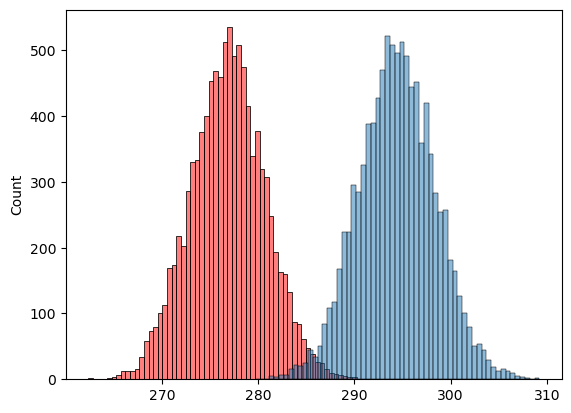

In [11]:
# Данные контроля и теста
df_control = pd.read_csv('Контроль.csv', sep=',')
df_test = pd.read_csv('Тест.csv', sep=',')

# Проверка нормальности средних

sample_means_control = []
sample_means_test = []

for i in range(10000):
    sample_control = df_control.NPV.sample(frac=1, replace=True)
    sample_test = df_test.NPV.sample(frac=1, replace=True)
    sample_means_control.append(sample_control.mean())
    sample_means_test.append(sample_test.mean())
    
sns.histplot(sample_means_control, color = 'red', alpha = 0.5)
sns.histplot(sample_means_test, alpha = 0.5)

Как мы видим на графике - средние распределены нормально, причем распределение теста смещено вправо относительно распределения контроля, что является звоночком для подтверждения гипотезы роста доходности нашего продукта из-за уменьшения тарифа. Но сначала в этом убедимся t-тестом, который должен хорошо отработать ввиду нормальности средних. <br>

**Гипотеза:** доходность нашего продукта вырастет из-за уменьшения тарифа <br>
**Нулевая гипотеза:** уменьшение цены не увеличит доходность продукта<br>
**Альтернативная гипотеза:** уменьшение цены увеличит доходность продукта<br>
**Пороговое значение p-value:** 0.05 

In [17]:
# Проверка параметрическим t-тестом
p_value = stats.ttest_ind(df_control.NPV,
                         df_test.NPV,
                         equal_var=False,
                         alternative='less')[1]
print(f'p_value = {round(p_value,5)} => Отклоняем нулевую гипотезу о том, что уменьшение цены не увеличит доходность продукта'
      if p_value < alpha 
      else f'p_value = {round(p_value,5)} => Принимаем нулевую гипотезу о том, что уменьшение цены не увеличит'
      'доходность продукта')

p_value = 0.00076 => Отклоняем нулевую гипотезу о том, что уменьшение цены не увеличит доходность продукта


**Вывод:** p_value оказался меньше уровня значимости 0.05, значит принимаем алтернативную гипотезу о том, что уменьшение цены увеличит доходность продукта, то есть изменения в продукте делать будем для всех пользователей!

------------------

# A/B тест №2

**Контекст** <br>
ЦБ смягчило правило, ограничивающее варианты продажи услуги.
Мы хотим попробовать
более агрессивную продажу услуги,
но боимся,
что это повлияет на экономику основного продукта (КК)
из-за негатива клиентов.

**Тест** <br>
Мы проводим тест,
в рамках которого мы разбиваем весь поток
на две части рановероятно,
где одной части (контролю) 
мы будем предлагать услугу текущим способом,
а второй части (тесту) 
новым более агрессивным способом.
Целью этого теста 
является увеличение доходности КК + услуги.

**Статистические вводные**<br>
- Проверка однородности выбранного параметра осуществяется с уровнем значимости 2%.
- Уровень значимости 5%.
- Мы хотели бы различать 3%-ное изменение целевой метрикис вероятностью 85%.

**Описание данных** <br>

Процесс оформления кредитной карты (КК) устроен следующим образом: <br>

- человек заходит на сайт и заполняет информацию о себе (в том числе возраст и доход клиента) для получения кредитной карты;
- человек проходит скоринг (в том числе в рамках которого оценивается вероятность банкротства клиента);
- создаётся заявка на оформление кредитной карты;
- человеку выпускается виртуальная карта, а также предлагается наша услуга к этому счёту;
- с некоторой вероятностью человек утилизирует счёт (начинает им пользоваться);
- если человек не утилизирует счёт, мы несём некоторые затраты на время оператора и поддержку инфраструктуры;
- если человек утилизировал карту, мы имеем некоторый заработок (PV) и повышенные расходы.

Описание колонок в исторических данных.<br>

- ID - номер заявки, прошедшей скоринг
- Возраст - возраст клиента, указанный при оформлении КК
- Доход клиента - доход клиента, указанный при оформлении КК
- Вероятность банкротства - оценка вероятности банкротства клиента, полученная с помощью скоринга по параметрам клиента
- Флаг утилизация счёта - совершение первой расходной операции на счёте КК
- Расходы - сумма затрат на заявку
- PV КК - 0 если счёт не утилизирован, иначе = PV кредитной карты
- PV услуги - 0 если счёт не утилизирован, иначе = PV этой услуги
- NPV = PV КК + PV услуги - Расходы

### 1. Выбираем метрику и приводим аргументацию.

**Метрика - NPV** - наиболее показательный параметр дохода, как и в прошлом задании <br>

**Аргументация**: При проведении теста мы можем оценить NPV как для контрольной группы, которой будем продавать услугу текущим способом, так и для тестовой группы, которой будем продавать услугу более агрессивным способом. Сравнивая эти значения, мы сможем оценить, какой из способов продажи услуги приводит к более высокой доходности для КК и услуги в целом.

### 2. Альтернатива в критерии.

По условию задачи у нас есть предпочтения, что мы хотим выявить только увеличение доходности КК + услуги, значит используем одностороннюю альтернативу <br>
<br>
Её использование позволяет уменьшить вероятность ложноположительных результатов, т.е. ошибочно считать, что изменение способа продавания услуги привело к увеличению доходности продукта, когда на самом деле это не так. Если мы используем двустороннюю альтернативу, то мы должны рассматривать оба направления изменения метрики, что увеличивает вероятность получения ложноположительных результатов. <br>
<br>
Кроме того, использование односторонней альтернативы может помочь нам сфокусироваться на наших целях и получить более четкие и практически значимые результаты. Если мы заранее знаем, что наша гипотеза заключается только в увеличении доходности КК + услуги от изменения тарифа, то мы можем использовать эту информацию для более эффективного проведения А/В теста и более точной оценки его результатов.

### 3. Выбираем параметр(-ы), влияющий(-ие) на целевую метрику.

Параметр для проверки однородности стоит выбирать только из тех, что доступны до прохода человека по процессу заявки (соц-дем, параметры скоринга) <br>
Нужно выбрать тот параметр, от которого сильнее всего зависит целевая для теста метрика (к примеру, это можно определить по корреляции по историческим данным). <br>
С помощью корреляции Спирмена найдем нужный параметр:

In [22]:
print(
    df.NPV.corr(df['Возраст'],method='spearman'), 
    df.NPV.corr(df['Флаг утилизации счёта'],method='spearman'), 
    df.NPV.corr(df['Вероятность банкротства'], method='spearman'))

0.006404489801010866 0.7582683550341586 -0.15008798233638915


В качестве параметра, влияющего на целевую метрику возьмем "Флаг утилизации счёта" - у него сильная корреляция с NPV

### 4. Каков размер выборки? Приводим аргументацию.

Как было сказано выше - используем одностороннюю альтернативу. Для нее размер выборки вычисляется по формуле
<a href="https://ibb.co/C9gxWgz"><img src="https://i.ibb.co/Ydmvbm3/image.png" alt="image" border="0"></a>
где <br>
sigma^2 - выборочная дисперсия у NPV <br>
z - квантили распределения <br>
d - MDE - минимальный ожидаемый эффект, вычсиляемый по формуле: d = uplift * npv_mean <br>

Ниже приведен код, вычисляющий размер выборки по формуле

In [18]:
import pandas as pd
from scipy import stats
import seaborn as sns

# Данные из условия
alpha0 = 0.02
alpha = 0.05
uplift = 0.03
beta = 0.15

# Данные
df = pd.read_csv('hist_credit_card.csv', sep=',')

# Минимальный ожидаемый эффект — это наименьший истинный эффект полученный от изменений, 
# который с уверенностью сможет обнаружить статистический критерий.
mde = uplift * npv_mean # 256.8

# Дисперсия
var = df.NPV.var() # 473437865.8

# Размер выборки:
n = (2 * var * (stats.norm.ppf(0.95) - stats.norm.ppf(0.15))**2) / mde ** 2 # 103220.9

n = 103220.9, округляем до 103221

### 5. Проверка на однородность, применение критерия. Принятие решения. 

Проверим на однородность выборки, в качестве параметра мы взяли "Флаг утилизации счёта". Для начала попробуем визуализировать распределение:

<AxesSubplot:xlabel='Флаг утилизации счёта', ylabel='Count'>

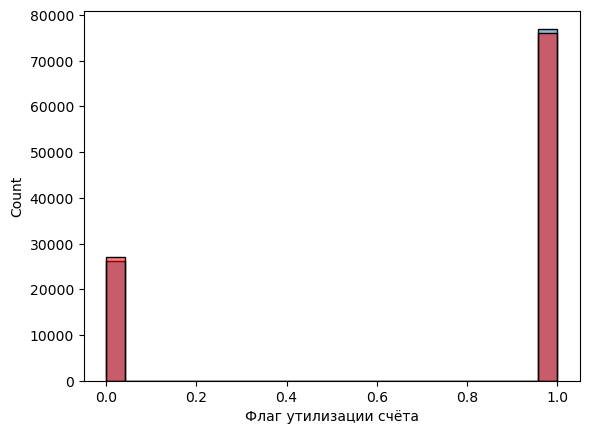

In [23]:
sns.histplot(data=df_control,x=df_control['Флаг утилизации счёта'], alpha = 0.5)
sns.histplot(data=df_test,x=df_test['Флаг утилизации счёта'], color = 'red', alpha = 0.5)

Как мы видим распределения почти совпадают, давайте убедимся в этом с помощью теста Андерсона-Дарлинга:

In [25]:
from scipy.stats import anderson_ksamp

# Извлечение значений флага утилизации счета для каждой выборки
x = df_control['Флаг утилизации счёта'].values
y = df_test['Флаг утилизации счёта'].values

# Проверка однородности выборок
result = anderson_ksamp([x, y])
p_value0 = result.significance_level

# Вывод результата
print(f'p_value = {round(p_value0,5)} => Отклоняем нулевую гипотезу о том, что выборки имеют разное распределение'
      if p_value0< alpha0
      else f'p_value = {round(p_value0,5)} => Принимаем нулевую гипотезу о том, что что выборки имеют разное распределение')

p_value = 0.001 => Отклоняем нулевую гипотезу о том, что выборки имеют разное распределение


C:\Users\а988\AppData\Local\Temp\ipykernel_9896\4007088701.py:8: UserWarning: p-value floored: true value smaller than 0.001
  result = anderson_ksamp([x, y])


p_value оказался меньше уровня значимости 0.02, значит выборки однородны!

<AxesSubplot:ylabel='Count'>

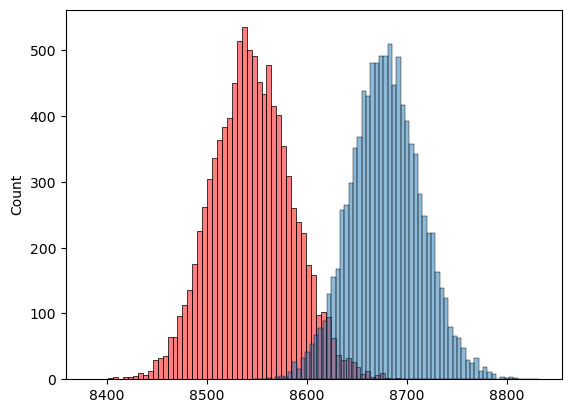

In [19]:
# Данные контроля и теста
df_control = pd.read_csv('Контроль.csv', sep=',')
df_test = pd.read_csv('Тест.csv', sep=',')

# Проверка нормальности средних

sample_means_control = []
sample_means_test = []

for i in range(10000):
    sample_control = df_control.NPV.sample(frac=1, replace=True)
    sample_test = df_test.NPV.sample(frac=1, replace=True)
    sample_means_control.append(sample_control.mean())
    sample_means_test.append(sample_test.mean())
    
sns.histplot(sample_means_control, color = 'red', alpha = 0.5)
sns.histplot(sample_means_test, alpha = 0.5)

Как мы видим на графике - средние распределены нормально, причем распределение теста смещено вправо относительно распределения контроля, что является опять звоночком для подтверждения гипотезы роста доходности нашего продукта из-за более агрессивного способа. Но сначала в этом убедимся t-тестом, который должен хорошо отработать ввиду нормальности средних. <br>

**Гипотеза:** увеличение доходности КК + услуги из-за предложения более агрессивным способом <br>
**Нулевая гипотеза:** новый способ не увеличит доходность КК + услуги<br>
**Альтернативная гипотеза:** новый способ увеличит доходность КК + услуги<br>
**Пороговое значение p-value:** 0.05 

In [21]:
p_value = stats.ttest_ind(df_control.NPV,
                         df_test.NPV,
                         equal_var=False,
                         alternative='less')[1]
print(f'p_value = {round(p_value,5)} => Отклоняем нулевую гипотезу о том, что новый способ не увеличит доходность КК + услуги'
      if p_value < alpha 
      else f'p_value = {round(p_value,5)} => Принимаем нулевую гипотезу о том, что новый способ'
      'не увеличит доходность КК + услуги')

p_value = 0.00576 => Отклоняем нулевую гипотезу о том, что новый способ не увеличит доходность КК + услуги


**Вывод:** p_value оказался меньше уровня значимости 0.05, значит принимаем алтернативную гипотезу о том, что новый способ увеличит доходность КК + услуги, то есть изменения можно раскатывать на всех пользователей!